In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [76]:
values = pd.read_csv('./train_values.csv')
labels = pd.read_csv('./train_labels.csv')

In [77]:
values.shape, labels.shape

((260601, 39), (260601, 2))

In [78]:
# Chequeamos que tengamos los mismos building_id en ambas tablas
assert(set(labels.building_id) == set(values.building_id))

In [79]:
df = values.merge(labels, how='inner', on='building_id')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


---

In [80]:
# Análisis exploratorio de los datos

In [81]:
# Calculo el value_counts para ordenar de mayor a menor, me quedo con el indice y convierto a lista
unique_ids = df['geo_level_1_id'].value_counts().index.tolist()

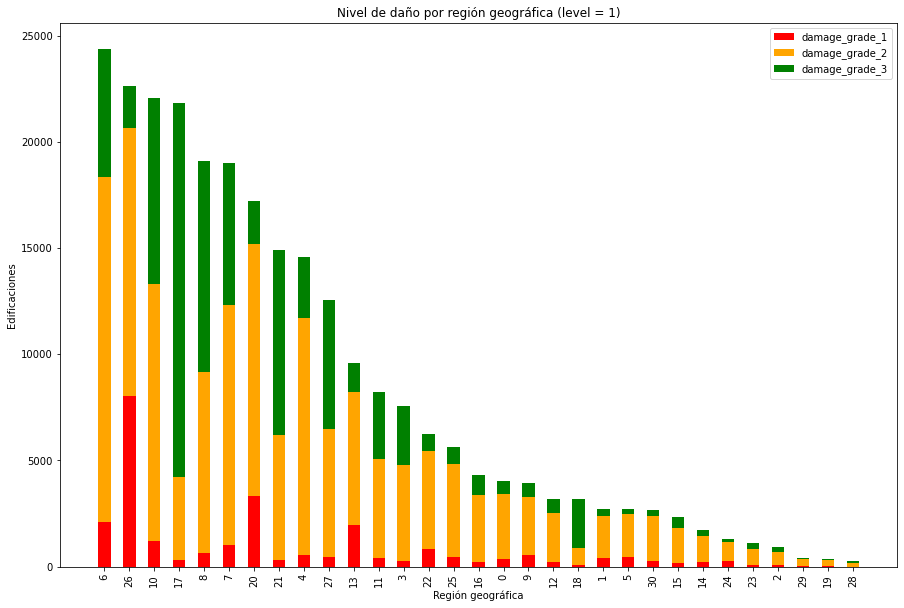

In [82]:
labels = unique_ids
damage_1 = [len(df.loc[(df['geo_level_1_id'] == i) & (df['damage_grade'] == 1)]) for i in unique_ids]
damage_2 = [len(df.loc[(df['geo_level_1_id'] == i) & (df['damage_grade'] == 2)]) for i in unique_ids]
damage_3 = [len(df.loc[(df['geo_level_1_id'] == i) & (df['damage_grade'] == 3)]) for i in unique_ids]
width = 0.5

fig, ax = plt.subplots(figsize=(15,10))

# Heights of damage_1 + damage_2
bars = np.add(damage_1, damage_2).tolist()

x = np.arange(len(labels))
ax.bar(x, damage_1, width, label='damage_grade_1', color='red')
ax.bar(x, damage_2, width, bottom=damage_1, label='damage_grade_2', color='orange')
ax.bar(x, damage_3, width, bottom=bars, label='damage_grade_3', color='green')

ax.set_xlabel('Región geográfica')
ax.set_ylabel('Edificaciones')
ax.set_title('Nivel de daño por región geográfica (level = 1)')
ax.legend()

plt.xticks(x, labels, rotation=90)
plt.show()

---

In [83]:
# Uno las dos listas en una lista de tuplas, luego ordeno por el 2do valor
merged_list = list(zip(unique_ids, damage_3))
merged_list.sort(key=lambda x: x[1], reverse=True)

In [84]:
# Me quedo con los ids ordenados
unzipped = list(zip(*merged_list))
unique_ids = list(unzipped[0])

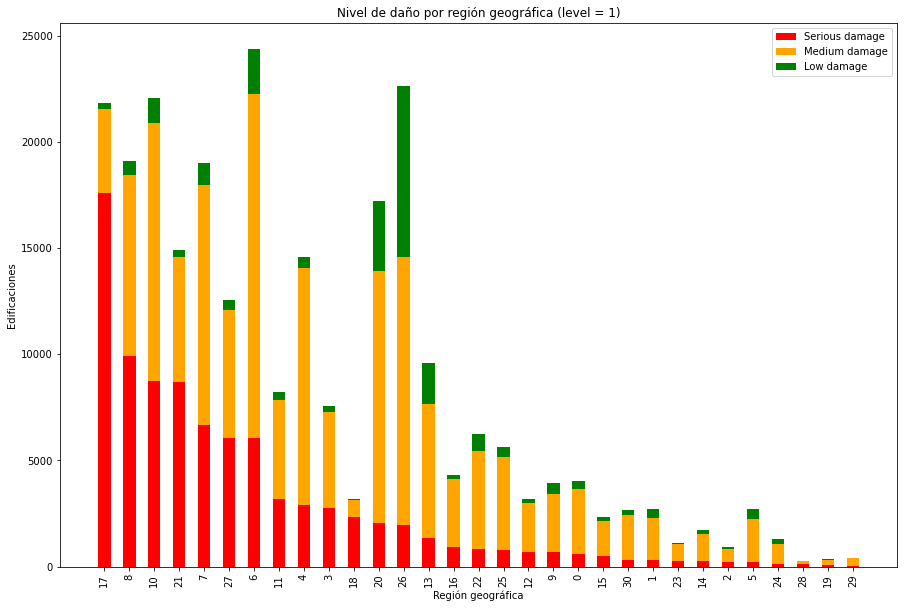

In [85]:
labels = unique_ids
damage_1 = [len(df.loc[(df['geo_level_1_id'] == i) & (df['damage_grade'] == 1)]) for i in unique_ids]
damage_2 = [len(df.loc[(df['geo_level_1_id'] == i) & (df['damage_grade'] == 2)]) for i in unique_ids]
damage_3 = [len(df.loc[(df['geo_level_1_id'] == i) & (df['damage_grade'] == 3)]) for i in unique_ids]
width = 0.5

fig, ax = plt.subplots(figsize=(15,10))

# Heights of damage_1 + damage_2
bars = np.add(damage_3, damage_2).tolist()

x = np.arange(len(labels))
ax.bar(x, damage_3, width, label='Serious damage', color='red')
ax.bar(x, damage_2, width, bottom=damage_3, label='Medium damage', color='orange')
ax.bar(x, damage_1, width, bottom=bars, label='Low damage', color='green')

ax.set_xlabel('Región geográfica')
ax.set_ylabel('Edificaciones')
ax.set_title('Nivel de daño por región geográfica (level = 1)')
ax.legend()

plt.xticks(x, labels, rotation=90)
plt.show()

---

In [86]:
# Analizamos la antiguedad de las viviendas
data = df['age']

No handles with labels found to put in legend.


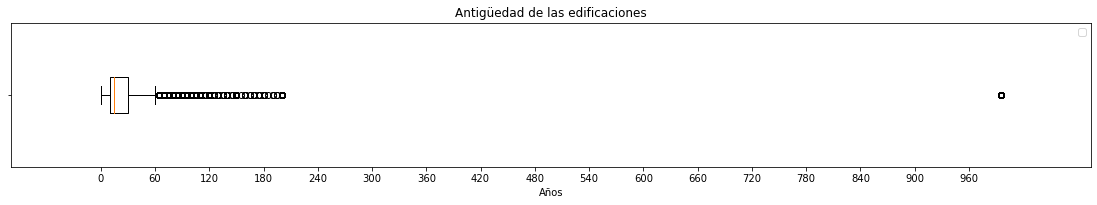

In [87]:
fig = plt.figure(figsize =(15, 2))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(data, vert=False)

plt.xticks(np.arange(min(data), max(data)+1, 60))

# Turn off tick labels
ax.set_yticklabels([])

plt.margins(x=0.1, y=-0.2)

ax.set_title('Antigüedad de las edificaciones')
ax.set_xlabel('Años')
ax.legend()

# show plot
plt.show()

In [88]:
data = data.loc[data < 240]

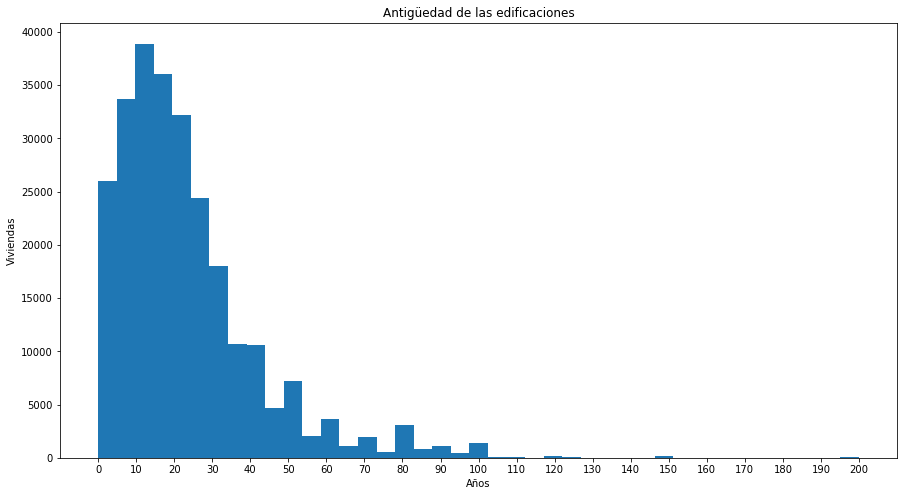

In [89]:
fig = plt.figure(figsize =(15, 8))

plt.hist(data, bins=len(data.unique()))

plt.xticks(np.arange(min(data), max(data)+1, 10))

plt.title('Antigüedad de las edificaciones')
plt.xlabel("Años")
plt.ylabel("Viviendas")

plt.show()

---

In [90]:
counts = data.value_counts()

# Uno las dos listas en una lista de tuplas, luego ordeno por el 2do valor
merged_list = list(zip(list(counts.index), list(counts.values)))
merged_list.sort(key=lambda x: x[0])

In [91]:
# Me quedo con los ids ordenados
unzipped = list(zip(*merged_list))
anios = list(unzipped[0])

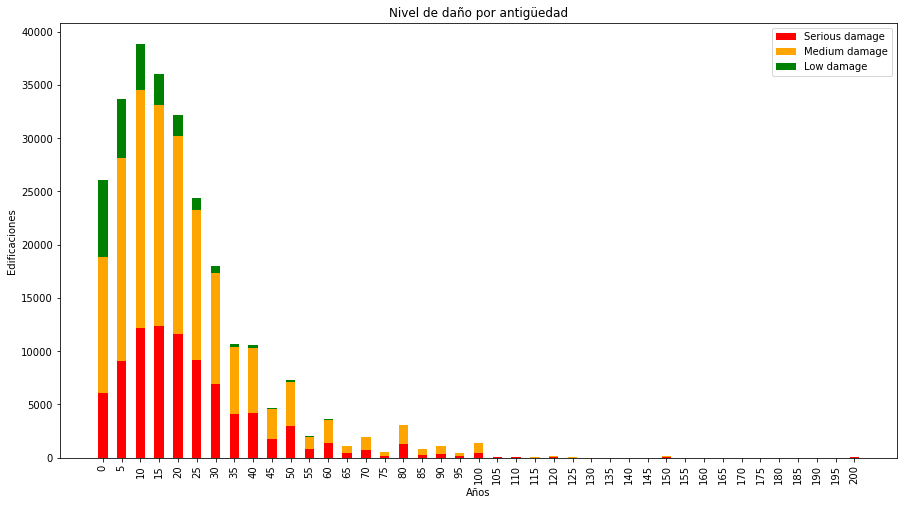

In [92]:
labels = anios
damage_1 = [len(df.loc[(df['age'] == i) & (df['damage_grade'] == 1)]) for i in anios]
damage_2 = [len(df.loc[(df['age'] == i) & (df['damage_grade'] == 2)]) for i in anios]
damage_3 = [len(df.loc[(df['age'] == i) & (df['damage_grade'] == 3)]) for i in anios]
width = 0.5

fig, ax = plt.subplots(figsize=(15,8))

# Heights of damage_1 + damage_2
bars = np.add(damage_3, damage_2).tolist()

x = np.arange(len(labels))
ax.bar(x, damage_3, width, label='Serious damage', color='red')
ax.bar(x, damage_2, width, bottom=damage_3, label='Medium damage', color='orange')
ax.bar(x, damage_1, width, bottom=bars, label='Low damage', color='green')

ax.set_xlabel('Años')
ax.set_ylabel('Edificaciones')
ax.set_title('Nivel de daño por antigüedad')
ax.legend()

plt.xticks(x, labels, rotation=90)
plt.show()

---

In [93]:
# Analizamos la cantidad de pisos antes del terremoto de las viviendas
data = df['count_floors_pre_eq']

In [94]:
counts = data.value_counts()

# Uno las dos listas en una lista de tuplas, luego ordeno por el 2do valor
merged_list = list(zip(list(counts.index), list(counts.values)))
merged_list.sort(key=lambda x: x[0])

In [95]:
# Me quedo con los ids ordenados
unzipped = list(zip(*merged_list))
pisos = list(unzipped[0])

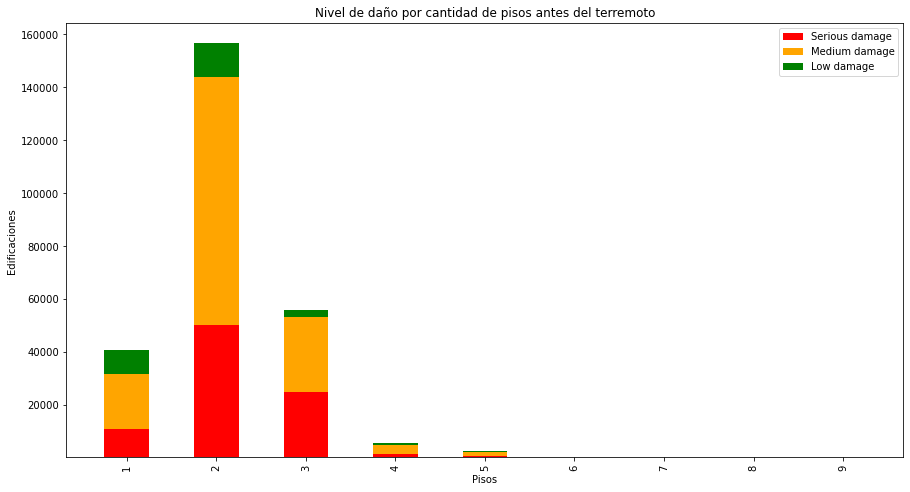

In [96]:
labels = pisos
damage_1 = [len(df.loc[(df['count_floors_pre_eq'] == i) & (df['damage_grade'] == 1)]) for i in pisos]
damage_2 = [len(df.loc[(df['count_floors_pre_eq'] == i) & (df['damage_grade'] == 2)]) for i in pisos]
damage_3 = [len(df.loc[(df['count_floors_pre_eq'] == i) & (df['damage_grade'] == 3)]) for i in pisos]
width = 0.5

fig, ax = plt.subplots(figsize=(15,8))

# Heights of damage_1 + damage_2
bars = np.add(damage_3, damage_2).tolist()

x = np.arange(len(labels))
ax.bar(x, damage_3, width, label='Serious damage', color='red')
ax.bar(x, damage_2, width, bottom=damage_3, label='Medium damage', color='orange')
ax.bar(x, damage_1, width, bottom=bars, label='Low damage', color='green')

ax.set_xlabel('Pisos')
ax.set_ylabel('Edificaciones')
ax.set_title('Nivel de daño por cantidad de pisos antes del terremoto')
ax.legend()

plt.xticks(x, labels, rotation=90)
plt.show()

---

In [97]:
# Analizamos la superficie normalizada ocupada por las viviendas
data = df['area_percentage']

In [98]:
counts = data.value_counts()

# Uno las dos listas en una lista de tuplas, luego ordeno por el 2do valor
merged_list = list(zip(list(counts.index), list(counts.values)))
merged_list.sort(key=lambda x: x[0])

In [99]:
# Me quedo con los ids ordenados
unzipped = list(zip(*merged_list))
area = list(unzipped[0])

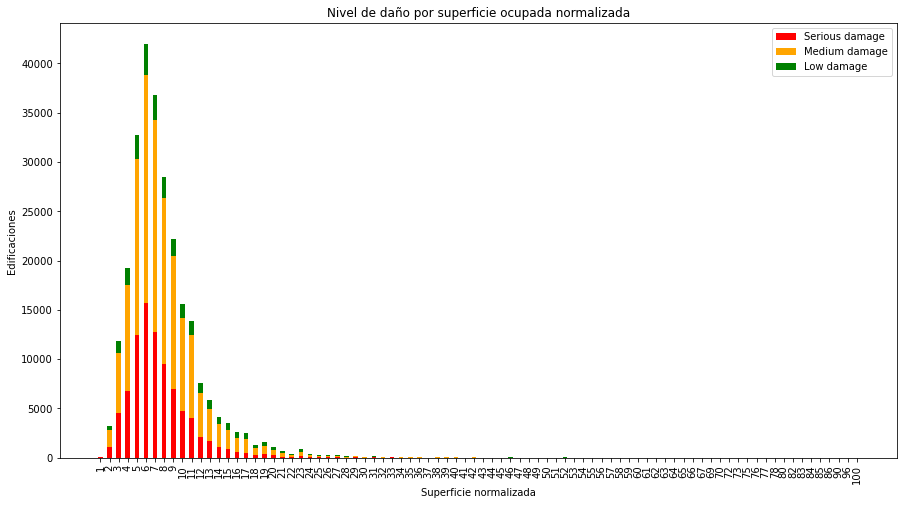

In [100]:
labels = area
damage_1 = [len(df.loc[(df['area_percentage'] == i) & (df['damage_grade'] == 1)]) for i in area]
damage_2 = [len(df.loc[(df['area_percentage'] == i) & (df['damage_grade'] == 2)]) for i in area]
damage_3 = [len(df.loc[(df['area_percentage'] == i) & (df['damage_grade'] == 3)]) for i in area]
width = 0.5

fig, ax = plt.subplots(figsize=(15,8))

# Heights of damage_1 + damage_2
bars = np.add(damage_3, damage_2).tolist()

x = np.arange(len(labels))
ax.bar(x, damage_3, width, label='Serious damage', color='red')
ax.bar(x, damage_2, width, bottom=damage_3, label='Medium damage', color='orange')
ax.bar(x, damage_1, width, bottom=bars, label='Low damage', color='green')

ax.set_xlabel('Superficie normalizada')
ax.set_ylabel('Edificaciones')
ax.set_title('Nivel de daño por superficie ocupada normalizada')
ax.legend()

plt.xticks(x, labels, rotation=90)
plt.show()

---

In [101]:
# Otros análisis

In [102]:
df_corr = df.select_dtypes(['number']).corr()
df_corr['s'] = df_corr.iloc[:,:].sum(axis=1)
df_corr = df_corr.sort_values(by='damage_grade', ascending=False)
df_corr = df_corr.filter(df_corr.index)

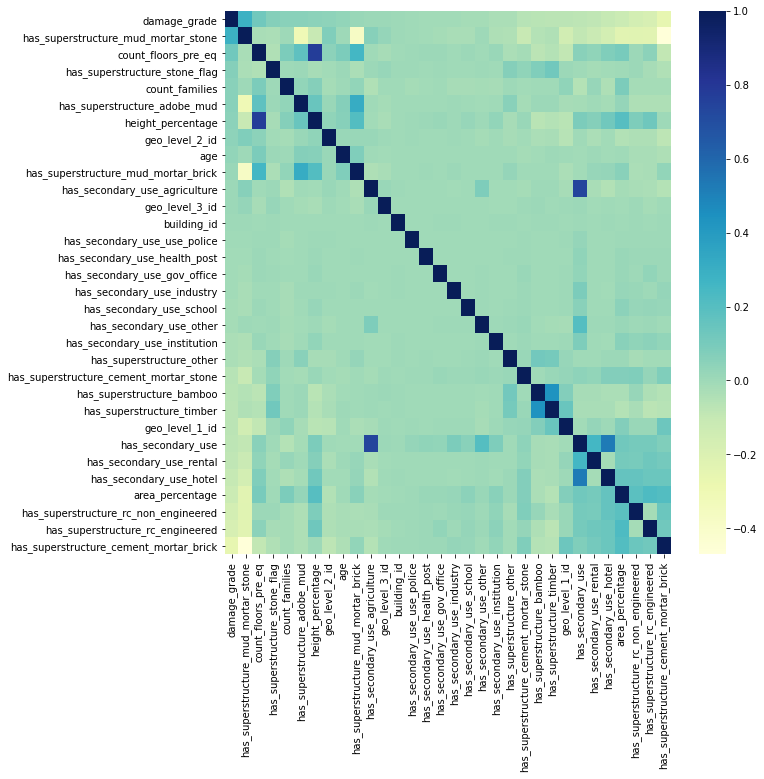

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, cmap="YlGnBu", annot = False)
plt.show()

In [104]:
# Coeficiente de determinación contra damage_grade
df_corr['damage_grade_determination'] = df_corr['damage_grade']**2

In [105]:
high_corr_features = df_corr.sort_values(
    by='damage_grade_determination', 
    ascending=False). \
    head(6).index

df_corr_reduced = df_corr.loc[high_corr_features][high_corr_features]

In [106]:
df_corr_reduced['damage_grade']

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_rc_engineered         -0.179014
has_superstructure_rc_non_engineered     -0.158145
area_percentage                          -0.125221
Name: damage_grade, dtype: float64

#### Descripción:
* has_superstructure_mud_mortar_stone (tipo: binario):  variable que indica si la edificación fue construida con barro - piedra.
* has_superstructure_cement_mortar_brick (tipo: binario):  variable que indica si la edificación fue construida con cemento - ladrillos.
* has_superstructure_rc_engineered (tipo: binario): variable que indica si la edificación fue construida con concreto reforzado diseñado.
* has_superstructure_rc_non_engineered (tipo: binario): variable que indica si la edificación fue construida con concreto reforzado no-diseñado.
* area_percentage (tipo: entero): superficie normalizada ocupada por la edificación.

### Por la descripción, estás variables deberían estar altamente correlacionadas

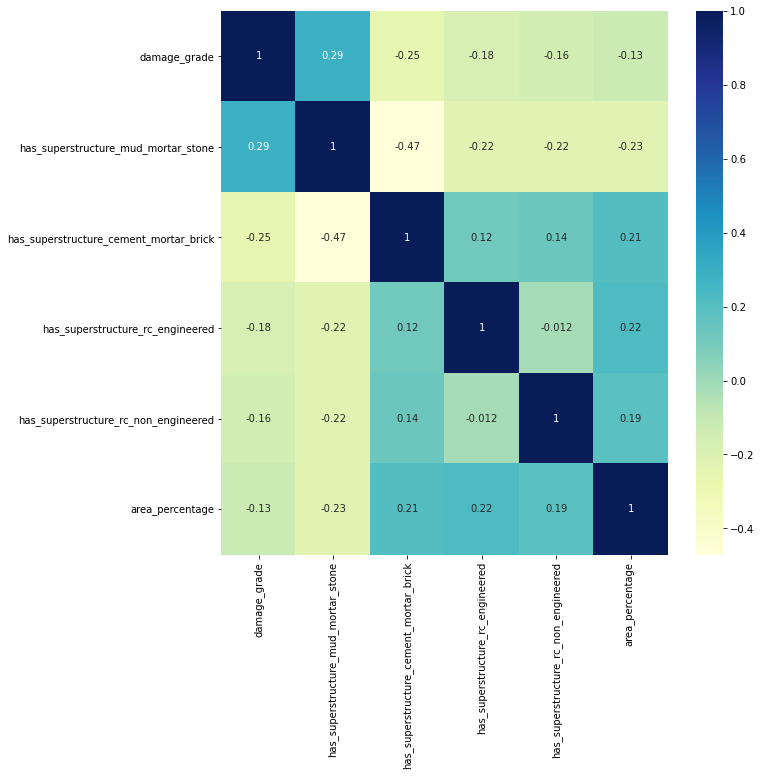

In [107]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr_reduced, cmap="YlGnBu", annot = True)
plt.show()

#### Hipótesis 1: La vivientas de menor calidad sufrieron mayores daños

In [108]:
df['calidad_construccion'] = (df['has_superstructure_cement_mortar_brick']+df['has_superstructure_rc_engineered']+df['has_superstructure_rc_non_engineered']-df['has_superstructure_mud_mortar_stone'])
df['calidad_construccion'] = (df['calidad_construccion']-df['calidad_construccion'].min())/(df['calidad_construccion'].max()-df['calidad_construccion'].min())

In [109]:
# Muy pocos con score 1
df['calidad_construccion'].value_counts()

0.00    194026
0.25     40323
0.50     22206
0.75      4032
1.00        14
Name: calidad_construccion, dtype: int64

In [110]:
# Los junto
df['calidad_construccion'] = df['calidad_construccion'].apply(lambda x: 0.75 if x>0.75 else x)

In [111]:
# Mejor
calidad_counts = df['calidad_construccion'].value_counts().to_frame().reset_index(drop=False)
calidad_counts.columns = ['calidad_construccion', 'count']
calidad_counts

,calidad_construccion,count
0,0.00,194026
1,0.25,40323
2,0.50,22206
3,0.75,4046


In [112]:
# Parece haber una diferencia de medias
df.groupby('calidad_construccion').mean()['damage_grade']

calidad_construccion
0.00    2.341666
0.25    2.144161
0.50    1.631631
0.75    1.547454
Name: damage_grade, dtype: float64

In [113]:
# Calculo porcentajes
df['sum']=1
percentages = df.groupby(['calidad_construccion', 'damage_grade'])['sum'].sum().to_frame()
df = df.drop('sum', axis=1)
percentages=percentages.reset_index(drop=False)
percentages = percentages.merge(calidad_counts, on ='calidad_construccion')
percentages['percentage'] = percentages['sum'] / percentages['count']

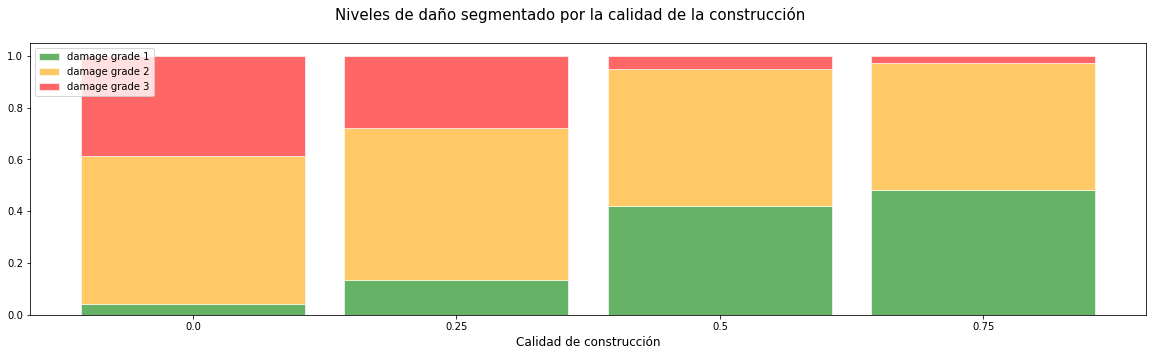

In [114]:
# Grafico
fig, ax = plt.subplots(figsize=(20,5))
r = [0,1,2,3]
names = list(df['calidad_construccion'].unique())

greenBars = list(percentages[percentages['damage_grade']==1].percentage.values)
orangeBars = list(percentages[percentages['damage_grade']==2].percentage.values)
redBars = list(percentages[percentages['damage_grade']==3].percentage.values)
 
barWidth = 0.85
plt.bar(r, greenBars, color='green', edgecolor='white', width=barWidth, label = 'damage grade 1', alpha = .6)
plt.bar(r, orangeBars, bottom=greenBars, color='orange', edgecolor='white', width=barWidth, label = 'damage grade 2', alpha = .6)
plt.bar(r, redBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='red', edgecolor='white', width=barWidth, label = 'damage grade 3', alpha = .6)

plt.legend()
plt.suptitle("Niveles de daño segmentado por la calidad de la construcción", size=15)

plt.xticks(r, names)
plt.xlabel("Calidad de construcción", size = 12)
 
plt.show()

#### Analizamos geo_loc_1

In [115]:
geo_df = df.groupby(['geo_level_1_id']).mean()['damage_grade']

In [116]:
geo_df = geo_df.to_frame()
geo_df['rounded'] = geo_df['damage_grade'].apply(round)

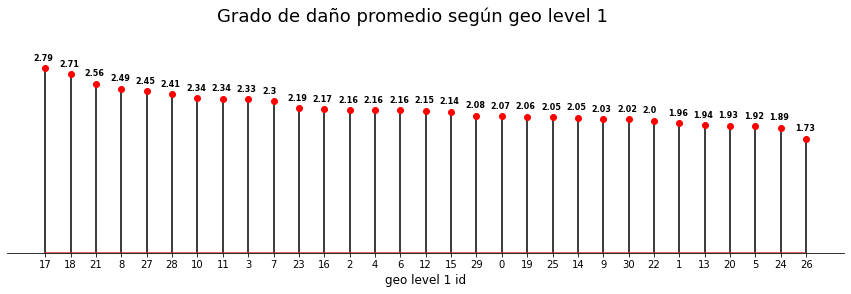

In [117]:
my_range=range(0,df.geo_level_1_id.nunique())
plt.figure(figsize=(15,4))
geo_df = df.groupby('geo_level_1_id').mean().damage_grade.sort_values(ascending=False)
plt.stem(geo_df, use_line_collection=True, linefmt = 'k', markerfmt='ro')
plt.ylim(0, geo_df.max()+.5)
plt.xticks( my_range, geo_df.index)
plt.xlabel('geo level 1 id', size = 12)
plt.suptitle('Grado de daño promedio según geo level 1', size = 18)
plt.tick_params(labelleft=False, left=False)
for pos in ['right', 'top', 'left']:
    plt.gca().spines[pos].set_visible(False)
for i, geo in enumerate(geo_df.index):
    plt.annotate(round(geo_df[geo], 2), xy = (i-.65 + .2, geo_df[geo] + .12), weight = 'bold', fontsize = 8 )
plt.show()

#### Comparo contra Roof_type

In [118]:
df.roof_type.value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [119]:
df.groupby('roof_type').mean().damage_grade

roof_type
n    2.269637
q    2.320173
x    1.572267
Name: damage_grade, dtype: float64

In [120]:
# Mejor
roof_counts = df['roof_type'].value_counts().to_frame().reset_index(drop=False)
roof_counts.columns = ['roof_type', 'count']
roof_counts

,roof_type,count
0,n,182842
1,q,61576
2,x,16183


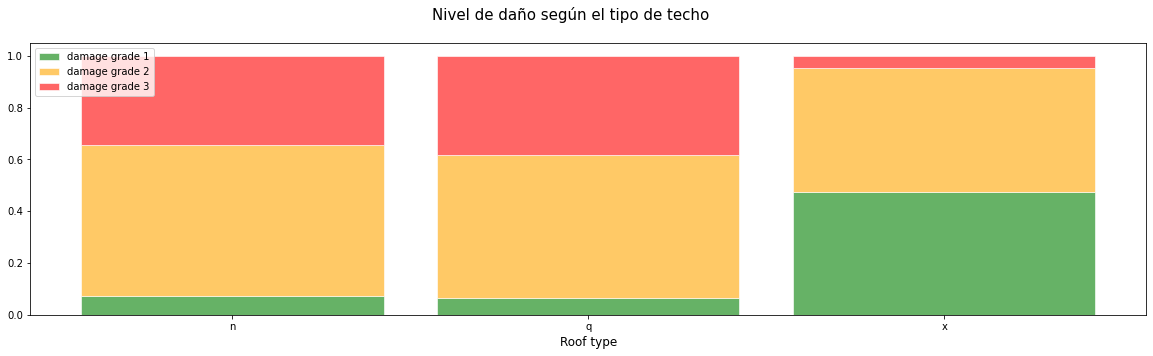

In [121]:
# Calculo porcentajes
df['sum']=1
percentages = df.groupby(['roof_type', 'damage_grade'])['sum'].sum().to_frame()
df = df.drop('sum', axis=1)
percentages=percentages.reset_index(drop=False)
percentages = percentages.merge(roof_counts, on ='roof_type')
percentages['percentage'] = percentages['sum'] / percentages['count']

# Grafico
fig, ax = plt.subplots(figsize=(20,5))
r = [0,1,2]
names = list(df['roof_type'].unique())

greenBars = list(percentages[percentages['damage_grade']==1].percentage.values)
orangeBars = list(percentages[percentages['damage_grade']==2].percentage.values)
redBars = list(percentages[percentages['damage_grade']==3].percentage.values)
 
barWidth = 0.85
plt.bar(r, greenBars, color='green', edgecolor='white', width=barWidth, label = 'damage grade 1', alpha = .6)
plt.bar(r, orangeBars, bottom=greenBars, color='orange', edgecolor='white', width=barWidth, label = 'damage grade 2', alpha = .6)
plt.bar(r, redBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='red', edgecolor='white', width=barWidth, label = 'damage grade 3', alpha = .6)

plt.legend()

plt.xticks(r, names)
plt.xlabel("Roof type", size = 12)
plt.suptitle("Nivel de daño según el tipo de techo", size = 15)
 
plt.show()

### Hipótesis 2: el tipo de techo está relacionado con la calidad de la construcción

In [122]:
df.groupby('roof_type').describe().calidad_construccion

,count,mean,std,min,25%,50%,75%,max
roof_type,,,,,,,,
n,182842.0,0.063793,0.136012,0.0,0.0,0.0,0.0,0.75
q,61576.0,0.065707,0.133879,0.0,0.0,0.0,0.0,0.75
x,16183.0,0.525752,0.152904,0.0,0.5,0.5,0.5,0.75


#### Hipótesis 3: Proximidad al epicentro

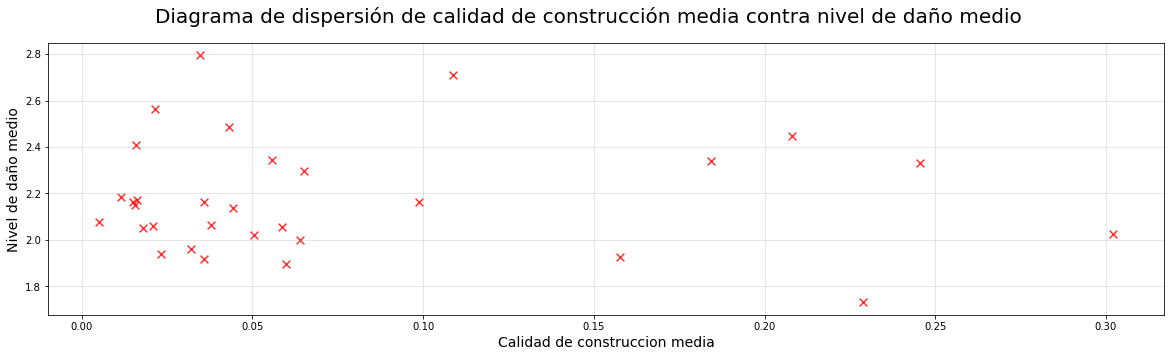

In [123]:
_ = df.groupby('geo_level_1_id').mean()[['calidad_construccion', 'damage_grade']]
fig, ax = plt.subplots(figsize=(20,5))
plt.scatter(x=_['calidad_construccion'], y=_['damage_grade'], alpha = .8, marker='x', s = 60, color = 'red')
plt.xlabel("Calidad de construccion media", size = 14)
plt.ylabel("Nivel de daño medio", size = 14)
plt.grid(alpha = .4)
plt.suptitle("Diagrama de dispersión de calidad de construcción media contra nivel de daño medio", size = 20)
plt.show()

In [124]:
df.groupby('geo_level_1_id')[['calidad_construccion', 'damage_grade']].describe()

calidad_construccion                                       \
                              count      mean       std  min   25%   50%   
geo_level_1_id                                                             
0                            4011.0  0.037833  0.106311  0.0  0.00  0.00   
1                            2701.0  0.031933  0.097768  0.0  0.00  0.00   
2                             931.0  0.035714  0.113592  0.0  0.00  0.00   
3                            7540.0  0.245524  0.153835  0.0  0.25  0.25   
4                           14568.0  0.014896  0.072180  0.0  0.00  0.00   
5                            2690.0  0.035967  0.115235  0.0  0.00  0.00   
6                           24381.0  0.098909  0.189201  0.0  0.00  0.00   
7                           18994.0  0.065126  0.158901  0.0  0.00  0.00   
8                           19080.0  0.043265  0.134088  0.0  0.00  0.00   
9                            3958.0  0.302173  0.251782  0.0  0.00  0.25   
10                          22079.0  0.055596  0.157134  0.0  0.00  0.00   
11                           8220.0  0.184215  0.184611  0.0  0.00  0.25   
12                           3194.0  0.015654  0.062487  0.0  0.00  0.00   
13                           9608.0  0.023236  0.085131  0.0  0.00  0.00   
14                           1714.0  0.017940  0.078332  0.0  0.00  0.00   
15                           2320.0  0.044289  0.096034  0.0  0.00  0.00   
16                           4332.0  0.016332  0.066072  0.0  0.00  0.00   
17                          21813.0  0.034647  0.131164  0.0  0.00  0.00   
18                           3189.0  0.108655  0.162300  0.0  0.00  0.00   
19                            372.0  0.020833  0.099202  0.0  0.00  0.00   
20                          17216.0  0.157542  0.191721  0.0  0.00  0.00   
21                          14889.0  0.021610  0.099235  0.0  0.00  0.00   
22                           6252.0  0.064060  0.157515  0.0  0.00  0.00   
23                           1121.0  0.011597  0.066643  0.0  0.00  0.00   
24                           1310.0  0.059733  0.113165  0.0  0.00  0.00   
25                           5624.0  0.058722  0.155044  0.0  0.00  0.00   
26                          22615.0  0.228952  0.229321  0.0  0.00  0.25   
27                          12532.0  0.208067  0.186443  0.0  0.00  0.25   
28                            265.0  0.016038  0.081286  0.0  0.00  0.00   
29                            396.0  0.005051  0.043280  0.0  0.00  0.00   
30                           2686.0  0.050354  0.148239  0.0  0.00  0.00   

                           damage_grade                                     \
                 75%   max        count      mean       std  min  25%  50%   
geo_level_1_id                                                               
0               0.00  0.75       4011.0  2.065320  0.478695  1.0  2.0  2.0   
1               0.00  0.75       2701.0  1.960755  0.513463  1.0  2.0  2.0   
2               0.00  0.75        931.0  2.162191  0.564648  1.0  2.0  2.0   
3               0.25  0.75       7540.0  2.331565  0.535401  1.0  2.0  2.0   
4               0.00  0.75      14568.0  2.162136  0.455400  1.0  2.0  2.0   
5               0.00  0.75       2690.0  1.919703  0.494919  1.0  2.0  2.0   
6               0.25  0.75      24381.0  2.161724  0.555431  1.0  2.0  2.0   
7               0.00  0.75      18994.0  2.297726  0.563802  1.0  2.0  2.0   
8               0.00  0.75      19080.0  2.485273  0.564228  1.0  2.0  3.0   
9               0.50  0.75       3958.0  2.026023  0.555788  1.0  2.0  2.0   
10              0.00  0.75      22079.0  2.341954  0.578562  1.0  2.0  2.0   
11              0.25  0.75       8220.0  2.337713  0.563577  1.0  2.0  2.0   
12              0.00  0.75       3194.0  2.152160  0.503682  1.0  2.0  2.0   
13              0.00  0.75       9608.0  1.937656  0.585702  1.0  2.0  2.0   
14              0.00  0.75       1714.0  2.049592  0.519770  1.0  2.0  2.0   
15              0.00  0.50

In [125]:
_.corr()

,calidad_construccion,damage_grade
calidad_construccion,1.000000,-0.047216
damage_grade,-0.047216,1.000000
